In [1]:
import h5py
import numpy as  np
from pathlib import Path
import math
from source.preprocessHighFPS import _chunk_to_fft
import matplotlib.pyplot as plt

In [25]:
BASE_DIR = Path("D:/Studia/sium/semestr3/radar-project/data")  # change to your project dir

loaded_file = h5py.File(BASE_DIR/'dataset.h5','r')
frames = loaded_file['8']['dataset_8']
frames = frames[::10,0,0,:]

In [26]:
print(frames.shape)

(1989, 512)


In [27]:
from source import helper

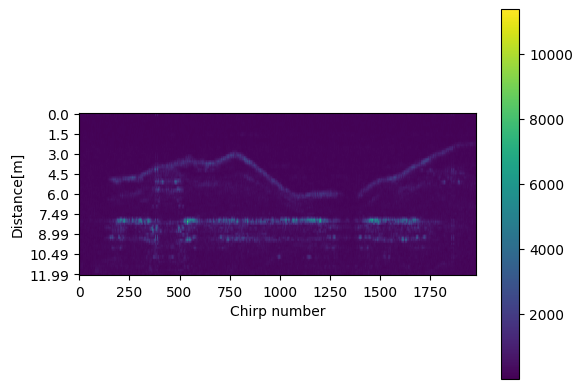

In [34]:
diff = helper.diff_frames(frames,  10)
spect,y =  helper.gen_spectogram(diff)
helper.print_spectogram(spect,y, 10,  12,10)

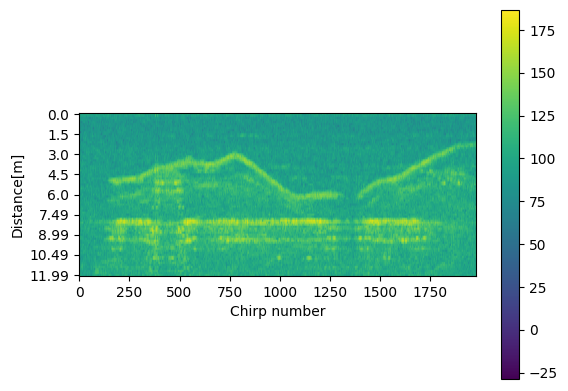

In [35]:
diff = helper.diff_frames(frames,  10)
spect,y =  helper.gen_spectogram(diff)
spectdb  = helper.to_dB(spect)
helper.print_spectogram(spectdb,y, 10,  12,10)

In [36]:
def get_window(frames, start, length):
    return frames[start:start+length,:]

def get_window_from_spect(spect, start, length):
    return spect[:,start:start+length]

In [37]:
frames.shape

(1989, 512)

In [41]:
short = get_window_from_spect(spect,1600,100)
short.shape

(256, 100)

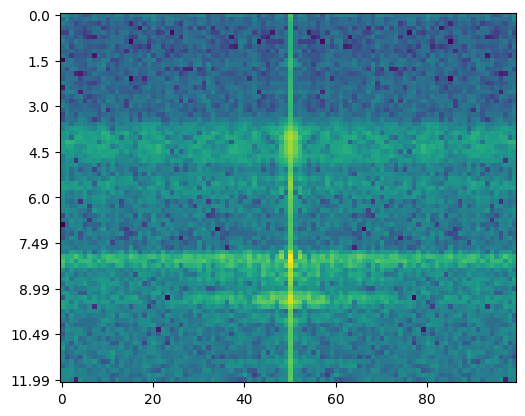

In [43]:
diff = helper.diff_frames(frames,10)
spect,y = helper.gen_spectogram(diff)
# spect = helper.to_dB(spect)
short = get_window_from_spect(spect,1600,100)
range_doppler = np.fft.fft(short, axis=1)
range_doppler = np.fft.fftshift(range_doppler, axes=1)
# plt.imshow(20*np.log(np.abs(range_doppler).T))
plt.yticks(np.arange(start=0, stop=81, step=10), y[:81:10])
plt.imshow(np.abs(helper.to_dB(range_doppler))[0:81,:], aspect=1)

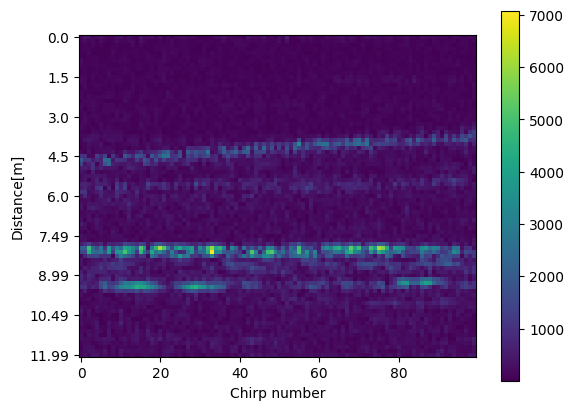

In [44]:
helper.print_spectogram(short,y, depth_limit=12, aspect=1)